<div style="width:100%;text-align: top;"> <img align=middle src="https://mmo.aiircdn.com/141/5ed59862e602f.png" alt="Heat beating" style="height:400px;margin-top:1rem;"> </div>

## BUILDING ENERGY CONSUMPTION ANALYSIS

In [238]:
#! usr/bin/env python 3
# coding: utf-8

# Importing librairies

import numpy as np                # numerical data processing
import pandas as pd               # numerical tables & time series
import scipy as sp                # numerical integration, interpolation, optimization, linear algebra, and statistics
import scipy.stats as st          # statistical functions
import seaborn as sns             # statistical data visualization
import matplotlib.pyplot as plt   # static, animated, and interactive visualizations in Python


In [239]:
# Transforming input files.csv to dataframes

df_energy_2015_init = pd.read_csv("2015-building-energy-benchmarking.csv")
df_energy_2016_init = pd.read_csv("2016-building-energy-benchmarking.csv")
df_energy_2015_init.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081


In [240]:
df_energy_2016_init.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86


In [241]:
def duplicates (data):
    """Calculate the number of duplicates in dataframe data"""
    
    return len(data)-len(data.drop_duplicates())


def missing_cells (data):
    """Calculate the number of empty cells in dataframe data"""
    
    return data.isna().sum().sum()


def missing_cells_percent (data):
    """Calculate the percentage of empty cells in dataframe data""" 
    
    return missing_cells(data)/(data.size)*100
    

def filled_cells (data):
    """Calculate the number of existing values in dataframe data"""
    
    return data.notna().sum()  
    

def filled_cells_percent (data):
    """Calculate the percentage of existing values in dataframe data"""
    
    return filled_cells(data)/(len(data.index))*100


In [242]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        #output += df.style.set_table_attributes.[{'selector': 'caption','props': 'caption-side: bottom; font-size:1.25em;'}]
        output += df.style.set_table_attributes("style='display:inline', font-weight: bold").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

__CREATION OF A DATAFRAME SUMMARIZING KEY INFO FROM THE INPUT FILES__

In [243]:
# INITIALISE FILES_SPEC TO SERIES DICTIONARY

list_files = ['2015-building-energy-benchmarking.csv', '2016-building-energy-benchmarking.csv', ]
files_spec = {'Total rows' : pd.Series([len(df_energy_2015_init), len(df_energy_2016_init)],
                        index = list_files),
              'Total columns' : pd.Series([len(df_energy_2015_init.columns), len(df_energy_2016_init.columns)],
                        index = list_files),
              'Total duplicates' : pd.Series([duplicates(df_energy_2015_init), duplicates(df_energy_2016_init)],
                        index = list_files),
              'Total Missing cells ' : pd.Series([missing_cells(df_energy_2015_init), missing_cells(df_energy_2016_init) ],
                        index = list_files),
              'Missing cells (%)' : pd.Series([missing_cells_percent(df_energy_2015_init), missing_cells_percent(df_energy_2016_init)],
                        index = list_files)}

# Creates Dataframe df_files_spec

df_files_spec = pd.DataFrame(files_spec)
index = df_files_spec.index
index. name = "Input File Name"
round(df_files_spec, 2)


,Total rows,Total columns,Total duplicates,Total Missing cells,Missing cells (%)
Input File Name,,,,,
2015-building-energy-benchmarking.csv,3340,47,0,26512,16.89
2016-building-energy-benchmarking.csv,3376,46,0,19952,12.85


__Checking the differences  between 2015 & 2016 files__

In [244]:
[c for c in df_energy_2015_init if c not in df_energy_2016_init]

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [245]:
[c for c in df_energy_2016_init if c not in df_energy_2015_init]

['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

__Focus on finding similarities in columns between both files__

In [246]:
# Split of the Location column into few columns

new = df_energy_2015_init["Location"].str.split(",|:", n = -1, expand = True)

# making separate column for each item 
df_energy_2015_init["Latitude"]= new[1]
df_energy_2015_init["Longitude"]= new[3]
df_energy_2015_init["Address"]= new[6]
df_energy_2015_init["City"]= new[8]
df_energy_2015_init["State"]= new[10]
df_energy_2015_init["ZipCode"]= new[12]
df_energy_2015 = df_energy_2015_init.drop(columns =["Location"])

spec_chars = ['"',"'","{","}"]
for char in spec_chars:
        df_energy_2015 = df_energy_2015.replace(char,'', regex=True)

df_energy_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,...,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,...,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101


In [247]:
# Columns in 2016 not available in 2015

[c for c in df_energy_2016_init if c not in df_energy_2015]

['Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [248]:
# Columns in 2015 not available in 2016

[c for c in df_energy_2015 if c not in df_energy_2016_init]

['OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [249]:
var_names = ['OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',  'Comment',
             '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts',
             'SPD Beats', 'Zip Codes']
df_rem_data = df_energy_2015[var_names]
percent_existing = df_rem_data.notnull().sum() * 100 / len(df_rem_data)
existing_data_df = pd.DataFrame({'Column label': df_rem_data.columns,
                                 'Existing data pct': percent_existing})
existing_data_df.reset_index(drop=True, inplace=True)
existing_data_df.sort_values('Existing data pct', ascending=False, inplace=True)
existing_data_df.index = np.arange(1, len(existing_data_df)+1)
existing_data_df['Existing data pct'] = existing_data_df['Existing data pct'].astype(float, errors = 'raise')
round(existing_data_df, 2)

,Column label,Existing data pct
1,Zip Codes,100.00
2,Seattle Police Department Micro Community Poli...,99.94
3,SPD Beats,99.94
4,OtherFuelUse(kBtu),99.70
5,GHGEmissions(MetricTonsCO2e),99.70
6,GHGEmissionsIntensity(kgCO2e/ft2),99.70
7,2010 Census Tracts,6.71
8,City Council Districts,6.38
9,Comment,0.39


__Few categories that are not particularly relevant to our study__

__2010 Census Tracts?__<br>
The "Census Tract" is an area roughly equivalent to a neighborhood established by the Bureau of Census for analyzing populations. They generally encompass a population between 2,500 to 8,000 people.

__Seattle Police Department Micro Community Policing Plan Areas?__<br>
The areas measured are concerns about crime and public safety and perceptions of police legitimacy, informal social control, social cohesion, fear of crime, social disorganization.

__What are Seattle Police Department (SPD) Beats?__<br>
Seattle is divided into five geographic areas. Within those areas are the 5 precincts or police stations: North, East, South, West and Southwest. Precinct boundaries were determined through consideration of neighborhood boundaries, geographic and other natural boundaries.

Each precinct contains smaller geographic areas called Sectors. There are 17 sectors total in the city.

Each of these Sectors are divided into between 3 smaller sections called Beats (i.e. Ocean sector has three beats O1, O2, O3) These are the areas that individual patrol officers are assigned responsibility for.

In [250]:
df_energy_2015['Comment'].value_counts().sum()

13

In [251]:
df_energy_2016_init['NumberofBuildings'].isnull().sum()

8

We notice that the sections Comments on both files do not have more than few entries which will not be helpful for the study.
In addition to that, all parameters related to crime or safety in the different areas of the city will not give us any further information.

In [252]:
df_energy_2015.drop(['Zip Codes', 'Seattle Police Department Micro Community Policing Plan Areas',
                     'SPD Beats', '2010 Census Tracts', 'City Council Districts', 'Comment'], axis=1, inplace=True)
df_energy_2016 = df_energy_2016_init.drop(['Comments'], axis=1)
df_energy_2016 = df_energy_2016[df_energy_2016['NumberofBuildings'].notnull()]


In [253]:
df_energy_2016['NumberofBuildings'].isnull().sum()

0

__Emissions__<br>Greenhouse gases are measured in 'carbon dioxide-equivalents' (CO2e). Data_energy_2015 have units in metrics tones CO2e while Data_energy_2016 do not have any units.
Plotting them side by side, both columns relate to each other in terms of order of magnitude so the 2016 data should be in metrics tones CO2e too.

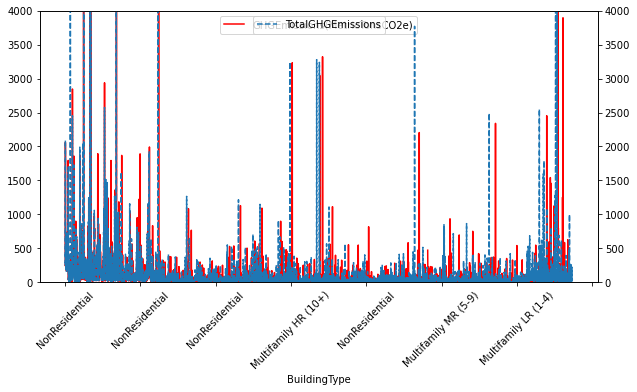

In [254]:
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()

df_energy_2015.plot(x="BuildingType", y=["GHGEmissions(MetricTonsCO2e)"], color="red", ax=ax)
df_energy_2016.plot(x="BuildingType", y=["TotalGHGEmissions"], ax=ax2, ls="--")
ax.set_ylim([0,4000])
ax2.set_ylim([0,4000])
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

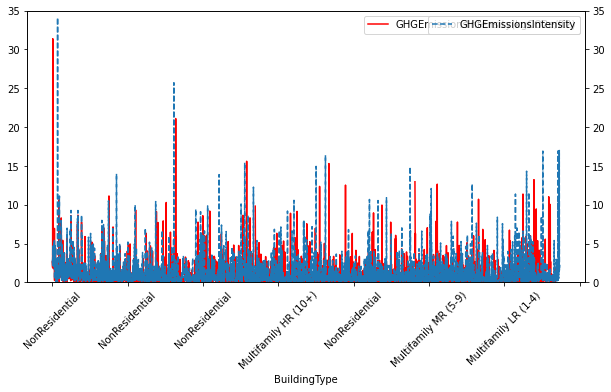

In [255]:
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
df_energy_2015.plot(x="BuildingType", y=["GHGEmissionsIntensity(kgCO2e/ft2)"], color="red", ax=ax)
df_energy_2016.plot(x="BuildingType", y=["GHGEmissionsIntensity"], ax=ax2, ls="--")
ax.set_ylim(0,35)
ax2.set_ylim(0,35)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

Correlations between GHG Emissions & GHG Emissions Intensity can be seen of the plots above i.e. both input files have these parameters with the same units. They represent the same thing and can be call identically in both files.

In [256]:
df_energy_2016.rename(columns={'GHGEmissionsIntensity': 'GHGEmissionsIntensity(kgCO2e/ft2)', 'TotalGHGEmissions': 'GHGEmissions(MetricTonsCO2e)'}, inplace=True)

We can now blend both dataframes together to get one single dataframe with both years of data.

In [257]:
# An intermediate cleaning phase to transform all strings in small letters with the first letter of each word in capital to make both files identical in wording
data_both = pd.concat([df_energy_2015,df_energy_2016], axis = 0).sort_values(["OSEBuildingID", "DataYear"])
data_both['PropertyName'] = data_both['PropertyName'].str.title()
data_both['Neighborhood'] = data_both['Neighborhood'].str.title()
data_both['City'] = data_both['City'].str.title()
data_both['Address'] = data_both['Address'].str.title()
data_both.ZipCode = data_both.ZipCode.astype(float, errors = 'raise')
data_both.ZipCode = data_both.ZipCode.apply(lambda x: '{:.0f}'.format(x))
data_both

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,Mayflower Park Hotel,659000030,7,Downtown,1927,1.0,...,2.64,No,Compliant,NaN,47.61219025,-122.33799744,405 Olive Way,Seattle,WA,98101
0,1,2016,NonResidential,Hotel,Mayflower Park Hotel,0659000030,7,Downtown,1927,1.0,...,2.83,False,Compliant,NaN,47.6122,-122.33799,405 Olive Way,Seattle,WA,98101
1,2,2015,NonResidential,Hotel,Paramount Hotel,659000220,7,Downtown,1996,1.0,...,2.38,No,Compliant,NaN,47.61310583,-122.33335756,724 Pine St,Seattle,WA,98101
1,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,Downtown,1996,1.0,...,2.86,False,Compliant,NaN,47.61317,-122.33393,724 Pine Street,Seattle,WA,98101
2,3,2015,NonResidential,Hotel,Westin Hotel,659000475,7,Downtown,1969,1.0,...,1.92,Yes,Compliant,NaN,47.61334897,-122.33769944,1900 5Th Ave,Seattle,WA,98101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture Building,1624049080,2,Greater Duwamish,1990,1.0,...,1.70,True,Error - Correct Default Data,NaN,47.56722,-122.31154,1600 S Dakota St,Seattle,WA,nan
3372,50223,2016,Nonresidential COS,Other,International District/Chinatown Cc,3558300000,2,Downtown,2004,1.0,...,2.01,False,Compliant,NaN,47.59625,-122.32283,719 8Th Ave S,Seattle,WA,nan
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,Magnolia / Queen Anne,1974,1.0,...,16.99,False,Compliant,NaN,47.63644,-122.35784,1920 1St Ave W,Seattle,WA,nan
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,Greater Duwamish,1989,1.0,...,1.57,False,Compliant,NaN,47.52832,-122.32431,8319 8Th Ave S,Seattle,WA,nan


In [258]:
percent_existing1 = data_both.notnull().sum() * 100 / len(data_both)
existing_data_df1 = pd.DataFrame({'Column label': data_both.columns,
                                 'Existing data pct': percent_existing1})
existing_data_df1.reset_index(drop=True, inplace=True)
existing_data_df1.sort_values('Existing data pct', ascending=False, inplace=True)
existing_data_df1.index = np.arange(1, len(existing_data_df1)+1)
existing_data_df1['Existing data pct'] = existing_data_df1['Existing data pct'].astype(float, errors = 'raise')
round(existing_data_df1, 2)

,Column label,Existing data pct
1,OSEBuildingID,100.00
2,PropertyGFATotal,100.00
3,State,100.00
4,City,100.00
5,Address,100.00
6,Longitude,100.00
7,Latitude,100.00
8,ComplianceStatus,100.00
9,DataYear,100.00
10,PropertyGFABuilding(s),100.00


__Weather Normalized Energy WNE__<br>
https://www.energystar.gov/sites/default/files/tools/Climate_and_Weather_2020_508.pdf<br>
Weather normalized energy is the energy your building would have used
under average conditions (also referred to as climate normals). The weather in a given year may be much
hotter or colder than your building’s normal climate; weather normalized energy accounts for this difference.
Note that the adjustment is for weather only, but not climate. That is, the metric evaluates your building
over time, but does not account for differences between your building and other locations that have different
average (normal) climates. Weather normalized energy is not available for new building design projects
because they have not yet experienced years with different weather.

In [259]:
data_both.drop(['SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)' ], axis=1, inplace=True)


__Comparison between columns units in both 2015 & 2016__

Text(0, 0.5, 'NaturalGas(kBtu)')

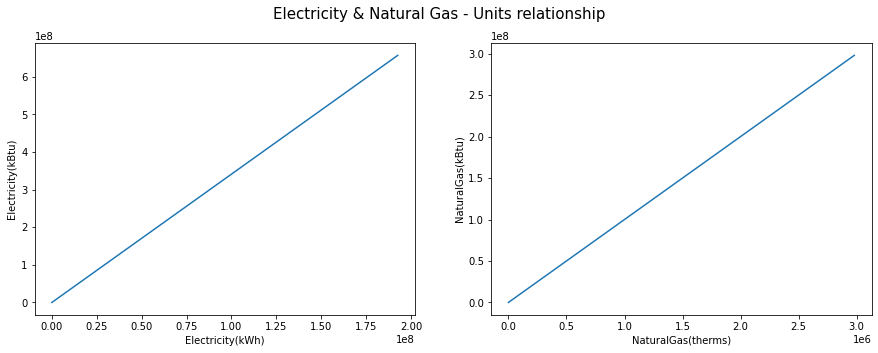

In [260]:
fig, axes = plt.subplots(1, 2, figsize=(15,5)) 
fig.suptitle(r"Electricity & Natural Gas - Units relationship", fontsize=15)

sns.lineplot(data=data_both, x='Electricity(kWh)', y = 'Electricity(kBtu)', ax=axes[0])
axes[0].set_xlabel("Electricity(kWh)")
axes[0].set_ylabel("Electricity(kBtu)")

sns.lineplot(data=data_both, x='NaturalGas(therms)', y = 'NaturalGas(kBtu)', ax=axes[1])
axes[1].set_xlabel("NaturalGas(therms)")
axes[1].set_ylabel("NaturalGas(kBtu)")


As seen on these 2 plots, Electricy in kWh and in kBtu as well as Natural Gas in therms and in kBtu follow linear curve.<br>
1 kWh = 3.412 kBtu and 1 kWh=~ 10kBtu. Input for these columns are identical but in different units so we'll keep the kBtu unit.

In [261]:
data_both.drop(['Electricity(kWh)', 'NaturalGas(therms)' ], axis=1, inplace=True)


__RESIDENTIAL BUILDINGS ONLY__<br>
Our team will look specifically to GHG Emissions from non residential buildings so all family households will be discarded in this study.

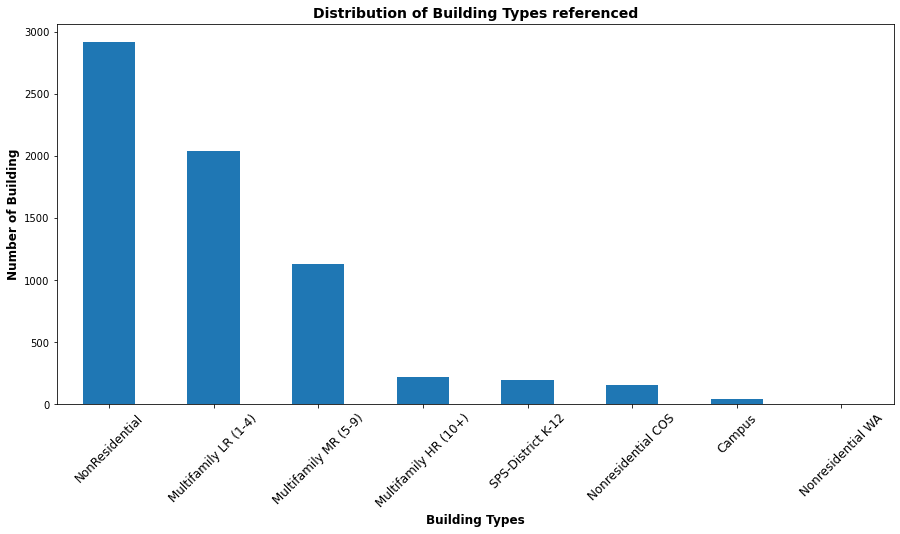

In [262]:
plt.rcParams["figure.figsize"] = (15,7)
res1 = data_both['BuildingType'].value_counts().plot(kind='bar')
plt.title('Distribution of Building Types referenced', fontsize = 14, weight = 'bold')
plt.xlabel ('Building Types', fontsize=12, weight = 'bold')
plt.ylabel ('Number of Building', fontsize=12, weight = 'bold')
res1.set_xticklabels (res1.get_xmajorticklabels(), rotation = 45, fontsize = 12, va = "top")
plt.show()

In [263]:
data_build = data_both[~data_both['BuildingType'].str.contains('Multifamily')]
data_build.to_csv('databuild.csv')
data_build

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,Mayflower Park Hotel,659000030,7,Downtown,1927,1.0,...,2.64,No,Compliant,NaN,47.61219025,-122.33799744,405 Olive Way,Seattle,WA,98101
0,1,2016,NonResidential,Hotel,Mayflower Park Hotel,0659000030,7,Downtown,1927,1.0,...,2.83,False,Compliant,NaN,47.6122,-122.33799,405 Olive Way,Seattle,WA,98101
1,2,2015,NonResidential,Hotel,Paramount Hotel,659000220,7,Downtown,1996,1.0,...,2.38,No,Compliant,NaN,47.61310583,-122.33335756,724 Pine St,Seattle,WA,98101
1,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,Downtown,1996,1.0,...,2.86,False,Compliant,NaN,47.61317,-122.33393,724 Pine Street,Seattle,WA,98101
2,3,2015,NonResidential,Hotel,Westin Hotel,659000475,7,Downtown,1969,1.0,...,1.92,Yes,Compliant,NaN,47.61334897,-122.33769944,1900 5Th Ave,Seattle,WA,98101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture Building,1624049080,2,Greater Duwamish,1990,1.0,...,1.70,True,Error - Correct Default Data,NaN,47.56722,-122.31154,1600 S Dakota St,Seattle,WA,nan
3372,50223,2016,Nonresidential COS,Other,International District/Chinatown Cc,3558300000,2,Downtown,2004,1.0,...,2.01,False,Compliant,NaN,47.59625,-122.32283,719 8Th Ave S,Seattle,WA,nan
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,Magnolia / Queen Anne,1974,1.0,...,16.99,False,Compliant,NaN,47.63644,-122.35784,1920 1St Ave W,Seattle,WA,nan
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,Greater Duwamish,1989,1.0,...,1.57,False,Compliant,NaN,47.52832,-122.32431,8319 8Th Ave S,Seattle,WA,nan


In [275]:
for col in data_build.columns:
    print(col)

OSEBuildingID
DataYear
BuildingType
PrimaryPropertyType
PropertyName
TaxParcelIdentificationNumber
CouncilDistrictCode
Neighborhood
YearBuilt
NumberofBuildings
NumberofFloors
PropertyGFATotal
PropertyGFAParking
PropertyGFABuilding(s)
ListOfAllPropertyUseTypes
LargestPropertyUseType
LargestPropertyUseTypeGFA
SecondLargestPropertyUseType
SecondLargestPropertyUseTypeGFA
ThirdLargestPropertyUseType
ThirdLargestPropertyUseTypeGFA
YearsENERGYSTARCertified
ENERGYSTARScore
SiteEUI(kBtu/sf)
SourceEUI(kBtu/sf)
SiteEnergyUse(kBtu)
SteamUse(kBtu)
Electricity(kBtu)
NaturalGas(kBtu)
OtherFuelUse(kBtu)
GHGEmissions(MetricTonsCO2e)
GHGEmissionsIntensity(kgCO2e/ft2)
DefaultData
ComplianceStatus
Outlier
Latitude
Longitude
Address
City
State
ZipCode


As we decided to keep data from 2015 & 2016, the best option is to keep an average value for categories that contain numerical values.

In [265]:
# Average on numerical values from 2015 & 2016

num_col = ['OSEBuildingID', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
           'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
           'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 
           'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 
           'GHGEmissionsIntensity(kgCO2e/ft2)']
data_mean= data_build[num_col].groupby('OSEBuildingID').mean()
data_mean['NumberofBuildings'] = np.ceil(data_mean.NumberofBuildings)
data_mean.to_csv('datameanx2.csv')
data_mean


,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
OSEBuildingID,,,,,,,,,,,,,,,,,
1,1.0,12.0,88434.0,0.0,88434.0,88434.0,NaN,NaN,62.5,80.299998,178.000000,7.103895e+06,2.013457e+06,3.816094e+06,1.274420e+06,249.705,2.735
2,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,56.0,94.600002,183.700003,8.371084e+06,0.000000e+00,3.574131e+06,4.797034e+06,279.685,2.620
3,1.0,41.0,959050.0,98359.0,860691.0,756868.0,100000.0,0.0,30.5,96.300000,242.299997,7.285884e+07,2.061348e+07,4.964455e+07,2.601850e+06,2075.380,2.055
5,1.0,10.0,61320.0,0.0,61320.0,61320.0,NaN,NaN,28.5,285.600002,426.249998,1.751195e+07,1.283648e+07,2.768974e+06,1.906554e+06,1111.385,18.025
8,1.0,18.0,147735.0,37230.0,110505.0,123445.0,68009.0,0.0,71.0,117.450002,220.099997,1.450085e+07,0.000000e+00,5.717426e+06,8.783552e+06,506.355,3.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,1.0,1.0,12294.0,0.0,12294.0,12294.0,NaN,NaN,46.0,69.099998,161.699997,8.497457e+05,0.000000e+00,5.242709e+05,3.254750e+05,20.940,1.700
50223,1.0,1.0,16000.0,0.0,16000.0,16000.0,NaN,NaN,NaN,59.400002,114.199997,9.502762e+05,0.000000e+00,3.965461e+05,5.537300e+05,32.170,2.010
50224,1.0,1.0,13157.0,0.0,13157.0,7583.0,5574.0,0.0,NaN,438.200012,744.799988,5.765898e+06,0.000000e+00,1.792159e+06,3.973739e+06,223.540,16.990


__Dataframe reconstitution__

In [304]:
list = [s for s in num_col if s != 'OSEBuildingID']

id_building = data_build.drop_duplicates(subset = 'OSEBuildingID', keep = 'last')
id_building = id_building.drop(columns=[col for col in id_building if col in list])

data_reconst = pd.merge(id_building, data_mean, how = 'left', on= 'OSEBuildingID')
data_reconst['ENERGYSTARScore'] = round(data_reconst['ENERGYSTARScore'])
data_reconst['NumberofFloors'] = round(data_reconst['NumberofFloors'])
data_reconst['NumberofBuildings'] = round(data_reconst['NumberofBuildings'])
data_reconst.to_csv('test1.csv')
data_reconst


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,ListOfAllPropertyUseTypes,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,NonResidential,Hotel,Mayflower Park Hotel,0659000030,7,Downtown,1927,Hotel,...,NaN,62.0,80.299998,178.000000,7.103895e+06,2.013457e+06,3.816094e+06,1.274420e+06,249.705,2.735
1,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,Downtown,1996,"Hotel, Parking, Restaurant",...,4622.0,56.0,94.600002,183.700003,8.371084e+06,0.000000e+00,3.574131e+06,4.797034e+06,279.685,2.620
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,0659000475,7,Downtown,1969,Hotel,...,0.0,30.0,96.300000,242.299997,7.285884e+07,2.061348e+07,4.964455e+07,2.601850e+06,2075.380,2.055
3,5,2016,NonResidential,Hotel,Hotel Max,0659000640,7,Downtown,1926,Hotel,...,NaN,28.0,285.600002,426.249998,1.751195e+07,1.283648e+07,2.768974e+06,1.906554e+06,1111.385,18.025
4,8,2016,NonResidential,Hotel,Warwick Seattle Hotel (Id8),0659000970,7,Downtown,1980,"Hotel, Parking, Swimming Pool",...,0.0,71.0,117.450002,220.099997,1.450085e+07,0.000000e+00,5.717426e+06,8.783552e+06,506.355,3.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,50222,2016,Nonresidential COS,Office,Horticulture Building,1624049080,2,Greater Duwamish,1990,Office,...,NaN,46.0,69.099998,161.699997,8.497457e+05,0.000000e+00,5.242709e+05,3.254750e+05,20.940,1.700
1694,50223,2016,Nonresidential COS,Other,International District/Chinatown Cc,3558300000,2,Downtown,2004,Other - Recreation,...,NaN,NaN,59.400002,114.199997,9.502762e+05,0.000000e+00,3.965461e+05,5.537300e+05,32.170,2.010
1695,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,Magnolia / Queen Anne,1974,"Fitness Center/Health Club/Gym, Other - Recrea...",...,0.0,NaN,438.200012,744.799988,5.765898e+06,0.000000e+00,1.792159e+06,3.973739e+06,223.540,16.990
1696,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,Greater Duwamish,1989,"Fitness Center/Health Club/Gym, Food Service, ...",...,484.0,NaN,51.000000,105.300003,7.194712e+05,0.000000e+00,3.488702e+05,3.706010e+05,22.110,1.570


Description of the different categories can be found here:
https://opendatanetwork.herokuapp.com/dataset/data.seattle.gov/h7rm-fz6m

In [305]:
sum_column = data_reconst["PropertyGFAParking"] + data_reconst["PropertyGFABuilding(s)"]
sum_column.equals(data_reconst['PropertyGFATotal'])


True

In [306]:
data_reconst.shape

(1698, 41)

In [322]:
data_sec = data_reconst[~((data_reconst['SiteEnergyUse(kBtu)'].isnull()) | (data_reconst['GHGEmissions(MetricTonsCO2e)'].isnull()))]
data_sec.to_csv('datasec1.csv')
data_sec.shape

(1697, 41)

In [308]:
tot = (data_sec["SteamUse(kBtu)"] + data_sec["Electricity(kBtu)"]+data_sec["NaturalGas(kBtu)"])/ data_sec["PropertyGFATotal"]
tot.equals(data_sec['SiteEUI(kBtu/sf)'])

False

créer une feature pour la surface totale des bâtiments, à partir de la surface au sol et du nombre d'étages
Un modèle pour estimer  l'énergie, l'électricité, le gaz et la vapeur . A partir des valeurs obtenues par mon meilleur modèle pour ces valeurs énergie, utiliser ces valeurs pour estimer les gaz à effet de serre.
There are two types of EUI: site and source. Site EUI is the amount of heat and electricity a buildings consumes as reflected in utility bills. Source EUI traces heat and electricity use back to the original raw input creating a more holistic understanding of a building's energy use.

__Feature Engineering__

In [323]:
data_sec['YearBuilt']

0       1927
1       1996
2       1969
3       1926
4       1980
        ... 
1693    1990
1694    2004
1695    1974
1696    1989
1697    1938
Name: YearBuilt, Length: 1697, dtype: int64

In [324]:
data_sec

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,ListOfAllPropertyUseTypes,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,NonResidential,Hotel,Mayflower Park Hotel,0659000030,7,Downtown,1927,Hotel,...,NaN,62.0,80.299998,178.000000,7.103895e+06,2.013457e+06,3.816094e+06,1.274420e+06,249.705,2.735
1,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,Downtown,1996,"Hotel, Parking, Restaurant",...,4622.0,56.0,94.600002,183.700003,8.371084e+06,0.000000e+00,3.574131e+06,4.797034e+06,279.685,2.620
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,0659000475,7,Downtown,1969,Hotel,...,0.0,30.0,96.300000,242.299997,7.285884e+07,2.061348e+07,4.964455e+07,2.601850e+06,2075.380,2.055
3,5,2016,NonResidential,Hotel,Hotel Max,0659000640,7,Downtown,1926,Hotel,...,NaN,28.0,285.600002,426.249998,1.751195e+07,1.283648e+07,2.768974e+06,1.906554e+06,1111.385,18.025
4,8,2016,NonResidential,Hotel,Warwick Seattle Hotel (Id8),0659000970,7,Downtown,1980,"Hotel, Parking, Swimming Pool",...,0.0,71.0,117.450002,220.099997,1.450085e+07,0.000000e+00,5.717426e+06,8.783552e+06,506.355,3.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,50222,2016,Nonresidential COS,Office,Horticulture Building,1624049080,2,Greater Duwamish,1990,Office,...,NaN,46.0,69.099998,161.699997,8.497457e+05,0.000000e+00,5.242709e+05,3.254750e+05,20.940,1.700
1694,50223,2016,Nonresidential COS,Other,International District/Chinatown Cc,3558300000,2,Downtown,2004,Other - Recreation,...,NaN,NaN,59.400002,114.199997,9.502762e+05,0.000000e+00,3.965461e+05,5.537300e+05,32.170,2.010
1695,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,Magnolia / Queen Anne,1974,"Fitness Center/Health Club/Gym, Other - Recrea...",...,0.0,NaN,438.200012,744.799988,5.765898e+06,0.000000e+00,1.792159e+06,3.973739e+06,223.540,16.990
1696,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,Greater Duwamish,1989,"Fitness Center/Health Club/Gym, Food Service, ...",...,484.0,NaN,51.000000,105.300003,7.194712e+05,0.000000e+00,3.488702e+05,3.706010e+05,22.110,1.570


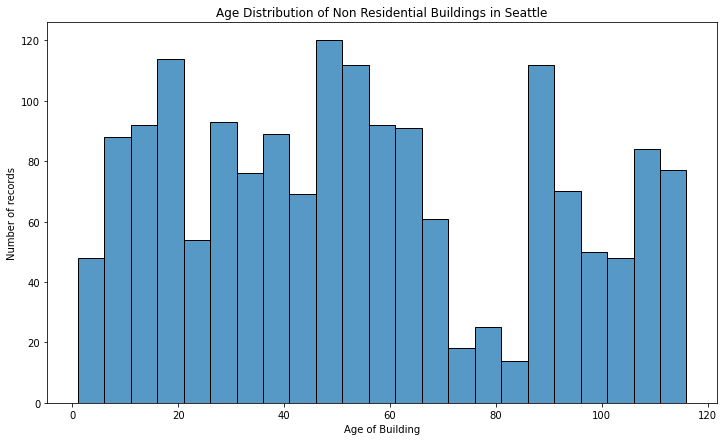

In [336]:
data_sec1 = data_sec.assign(AgeofBuilding = data_sec['DataYear'] - data_sec['YearBuilt'])
data_sec1.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(12,7))
inter = int((data_sec1['AgeofBuilding'].max() - data_sec1['AgeofBuilding'].min())/5)
ax = sns.histplot(data=data_sec1, x='AgeofBuilding', bins=inter)
ax.set_xlabel("Age of Building")
ax.set_ylabel("Number of records")
plt.title(f"Age Distribution of Non Residential Buildings in Seattle")
plt.show()